In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'E:\New folder\AV\Loan\train_ctrUa4K.csv')

In [3]:
df.shape

(614, 13)

In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
df.isna().sum()/len(df)*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [8]:
df.drop(['Loan_ID'], axis = 1, inplace = True)

In [9]:
import sweetviz as sv

In [10]:
my_report = sv.analyze(df)

:FEATURES DONE:                    |                     | [  0%]   00:03  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [11]:
my_report.show_html()

In [11]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000


In [12]:
df_new = df.copy()

In [13]:
df_new['Total_income'] = df_new['ApplicantIncome'] + df_new['CoapplicantIncome']

In [14]:
df_new.drop(['ApplicantIncome'], axis = 1, inplace = True)
df_new.drop(['CoapplicantIncome'], axis = 1, inplace = True)

In [15]:
df_new.corr()

,LoanAmount,Loan_Amount_Term,Credit_History,Total_income
LoanAmount,1.000000,0.036960,-0.000607,0.620316
Loan_Amount_Term,0.036960,1.000000,-0.004705,-0.070917
Credit_History,-0.000607,-0.004705,1.000000,-0.012563
Total_income,0.620316,-0.070917,-0.012563,1.000000


In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [17]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

In [18]:
calc_vif(df_new.iloc[:, [5, 6, 10]])

,variables,VIF
0,LoanAmount,6.455626
1,Loan_Amount_Term,3.717826
2,Total_income,3.555601


In [19]:
df_new.drop(['LoanAmount'], axis = 1, inplace = True)

In [20]:
calc_vif(df_new.iloc[:, [5, 9]])

,variables,VIF
0,Loan_Amount_Term,2.045172
1,Total_income,2.045172


In [21]:
df_new

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,Male,No,0,Graduate,No,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,360.0,1.0,Rural,Y,2900.0
610,Male,Yes,3+,Graduate,No,180.0,1.0,Rural,Y,4106.0
611,Male,Yes,1,Graduate,No,360.0,1.0,Urban,Y,8312.0
612,Male,Yes,2,Graduate,No,360.0,1.0,Urban,Y,7583.0


In [22]:
df_new.describe()

,Loan_Amount_Term,Credit_History,Total_income
count,614.000000,614.000000,614.000000
mean,342.410423,0.855049,7024.705081
std,64.428629,0.352339,6458.663872
min,12.000000,0.000000,1442.000000
25%,360.000000,1.000000,4166.000000
50%,360.000000,1.000000,5416.500000
75%,360.000000,1.000000,7521.750000
max,480.000000,1.000000,81000.000000


In [38]:
df_test = pd.read_csv(r'E:\New folder\AV\Loan\test_lAUu6dG.csv')

In [39]:
df_test.drop(['Loan_ID'], axis = 1, inplace = True)

In [40]:
df_test['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df_test['Married'].fillna(df['Married'].mode()[0], inplace = True)
df_test['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)
df_test['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)
df_test['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)

In [41]:
df_test.drop(['LoanAmount'], axis = 1, inplace = True)

In [42]:
df_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,360.0,1.0,Urban
4,Male,No,0,Not Graduate,No,3276,0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,360.0,1.0,Urban
363,Male,Yes,0,Graduate,No,4158,709,360.0,1.0,Urban
364,Male,No,0,Graduate,No,3250,1993,360.0,1.0,Semiurban
365,Male,Yes,0,Graduate,No,5000,2393,360.0,1.0,Rural


In [43]:
df_dummies

,Dependents,Loan_Amount_Term,Credit_History,Loan_Status,Total_income,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0.273231,1,1,-0.182184,0,1,1,0,1,0,1,0,0,0,1
1,1,0.273231,1,0,-0.144684,0,1,0,1,1,0,1,0,1,0,0
2,0,0.273231,1,1,-0.623656,0,1,0,1,1,0,0,1,0,0,1
3,0,0.273231,1,1,-0.322885,0,1,0,1,0,1,1,0,0,0,1
4,0,0.273231,1,1,-0.158785,0,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0.273231,1,1,-0.639152,1,0,1,0,1,0,1,0,1,0,0
610,3,-2.522836,1,1,-0.452274,0,1,0,1,1,0,1,0,1,0,0
611,1,0.273231,1,1,0.199475,0,1,0,1,1,0,1,0,0,0,1
612,2,0.273231,1,1,0.086512,0,1,0,1,1,0,1,0,0,0,1


In [44]:
df_tdummies = pd.get_dummies(df_test, columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'])

In [45]:
df_tdummies['Total_income'] = df_tdummies['ApplicantIncome'] + df_tdummies['CoapplicantIncome']

In [46]:
df_tdummies.drop(['ApplicantIncome'], axis = 1, inplace = True)
df_tdummies.drop(['CoapplicantIncome'], axis = 1, inplace = True)

In [47]:
df_tdummies['Dependents'].replace('3+', '3', inplace = True)

In [48]:
df_tdummies.iloc[:, [1,14]] = scaler.fit_transform(df_tdummies.iloc[:, [1,14]])

In [49]:
df_tdummies['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace = True)

In [50]:
df_tdummies['Credit_History'] = df_tdummies['Credit_History'].astype('int32')

In [51]:
df_tdummies

,Dependents,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_income
0,0,0.268382,1,0,1,0,1,1,0,1,0,0,0,1,-0.126182
1,1,0.268382,1,0,1,0,1,1,0,1,0,0,0,1,-0.346506
2,2,0.268382,1,0,1,0,1,1,0,1,0,0,0,1,0.081817
3,2,0.268382,1,0,1,0,1,1,0,1,0,0,0,1,-0.286803
4,0,0.268382,1,0,1,1,0,0,1,1,0,0,0,1,-0.596875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,3,0.268382,1,0,1,0,1,0,1,0,1,0,0,1,-0.113471
363,0,0.268382,1,0,1,0,1,1,0,1,0,0,0,1,-0.290462
364,0,0.268382,1,0,1,1,0,1,0,1,0,0,1,0,-0.218048
365,0,0.268382,1,0,1,0,1,1,0,1,0,1,0,0,0.196024


In [54]:
df_tdummies

,Dependents,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_income,Pred
0,0,0.268382,1,0,1,0,1,1,0,1,0,0,0,1,-0.126182,1
1,1,0.268382,1,0,1,0,1,1,0,1,0,0,0,1,-0.346506,1
2,2,0.268382,1,0,1,0,1,1,0,1,0,0,0,1,0.081817,1
3,2,0.268382,1,0,1,0,1,1,0,1,0,0,0,1,-0.286803,1
4,0,0.268382,1,0,1,1,0,0,1,1,0,0,0,1,-0.596875,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,3,0.268382,1,0,1,0,1,0,1,0,1,0,0,1,-0.113471,1
363,0,0.268382,1,0,1,0,1,1,0,1,0,0,0,1,-0.290462,1
364,0,0.268382,1,0,1,1,0,1,0,1,0,0,1,0,-0.218048,1
365,0,0.268382,1,0,1,0,1,1,0,1,0,1,0,0,0.196024,1


In [48]:
from pycaret.classification import *

In [150]:
df_clf = setup(df_new, target = 'Loan_Status', ordinal_features = {'Dependents' : ['0', '1', '2', '3+']}, normalize = True, 
               normalize_method='minmax')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,379
1,Target Type,Binary
2,Label Encoded,"N: 0, Y: 1"
3,Original Data,"(614, 10)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,7
7,Ordinal Features,True
8,High Cardinality Features,False
9,High Cardinality Method,None


In [151]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.822900,0.784100,0.983100,0.805900,0.885100,0.515100
1,Ridge Classifier,0.822900,0.000000,0.983100,0.805900,0.885100,0.515100
2,Linear Discriminant Analysis,0.822900,0.779600,0.983100,0.805900,0.885100,0.515100
3,Naive Bayes,0.811300,0.773900,0.963000,0.804300,0.876000,0.494800
4,SVM - Linear Kernel,0.806500,0.000000,0.963000,0.799000,0.872700,0.482600
5,Extreme Gradient Boosting,0.801900,0.757100,0.955700,0.798800,0.869600,0.469100
6,Ada Boost Classifier,0.799700,0.720200,0.932200,0.809900,0.865600,0.478200
7,Gradient Boosting Classifier,0.799700,0.769500,0.938600,0.805800,0.866200,0.473100
8,CatBoost Classifier,0.799600,0.776600,0.931800,0.808200,0.864700,0.480800
9,Light Gradient Boosting Machine,0.773900,0.757100,0.904900,0.797000,0.846100,0.419500


In [152]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7209,0.5923,0.9667,0.7250,0.8286,0.1541
1,0.8372,0.8154,1.0000,0.8108,0.8955,0.5446
2,0.8372,0.7667,0.9667,0.8286,0.8923,0.5669
3,0.7674,0.7718,0.9667,0.7632,0.8529,0.3323
4,0.9302,0.8436,1.0000,0.9091,0.9524,0.8230
5,0.8140,0.7537,0.9655,0.8000,0.8750,0.5235
6,0.7674,0.8227,0.9655,0.7568,0.8485,0.3786
7,0.8837,0.9064,1.0000,0.8529,0.9206,0.7083
8,0.8140,0.7069,1.0000,0.7838,0.8788,0.5029
9,0.8571,0.8621,1.0000,0.8286,0.9062,0.6170


In [153]:
tuned_df = tune_model('lr', optimize = 'Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7209,0.5923,0.9667,0.7250,0.8286,0.1541
1,0.8372,0.8154,1.0000,0.8108,0.8955,0.5446
2,0.8372,0.7513,0.9667,0.8286,0.8923,0.5669
3,0.7674,0.7641,0.9667,0.7632,0.8529,0.3323
4,0.9302,0.8436,1.0000,0.9091,0.9524,0.8230
5,0.8140,0.7586,0.9655,0.8000,0.8750,0.5235
6,0.7674,0.8251,0.9655,0.7568,0.8485,0.3786
7,0.8837,0.9015,1.0000,0.8529,0.9206,0.7083
8,0.8140,0.7069,1.0000,0.7838,0.8788,0.5029
9,0.8571,0.8647,1.0000,0.8286,0.9062,0.6170


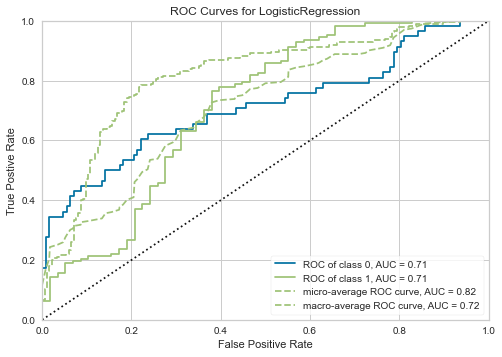

In [168]:
plot_model(lr)

In [169]:
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [183]:
df_clf1 = setup(df_new.iloc[:, [6, 7, 8]], target = 'Loan_Status')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,6461
1,Target Type,Binary
2,Label Encoded,"N: 0, Y: 1"
3,Original Data,"(614, 3)"
4,Missing Values,False
5,Numeric Features,0
6,Categorical Features,2
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [184]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.827400,0.769100,0.983000,0.808900,0.887000,0.535200
1,Naive Bayes,0.827400,0.780200,0.983000,0.808900,0.887000,0.535200
2,Decision Tree Classifier,0.827400,0.768600,0.983000,0.808900,0.887000,0.535200
3,Ridge Classifier,0.827400,0.000000,0.983000,0.808900,0.887000,0.535200
4,Random Forest Classifier,0.827400,0.777100,0.983000,0.808900,0.887000,0.535200
5,Ada Boost Classifier,0.827400,0.769100,0.983000,0.808900,0.887000,0.535200
6,Gradient Boosting Classifier,0.827400,0.768600,0.983000,0.808900,0.887000,0.535200
7,Linear Discriminant Analysis,0.827400,0.769100,0.983000,0.808900,0.887000,0.535200
8,Extra Trees Classifier,0.827400,0.768600,0.983000,0.808900,0.887000,0.535200
9,Extreme Gradient Boosting,0.827400,0.768600,0.983000,0.808900,0.887000,0.535200


In [187]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9070,0.8846,1.0000,0.8824,0.9375,0.7584
1,0.8372,0.7628,1.0000,0.8108,0.8955,0.5446
2,0.8372,0.8192,0.9333,0.8485,0.8889,0.5871
3,0.8140,0.6897,1.0000,0.7895,0.8824,0.4658
4,0.8140,0.7077,1.0000,0.7895,0.8824,0.4658
5,0.8372,0.7315,1.0000,0.8056,0.8923,0.5743
6,0.8140,0.7660,0.9655,0.8000,0.8750,0.5235
7,0.8605,0.8288,1.0000,0.8286,0.9062,0.6427
8,0.7674,0.7475,0.9655,0.7568,0.8485,0.3786
9,0.7857,0.7533,0.9655,0.7778,0.8615,0.4112


In [188]:
tune_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9070,0.8846,1.0000,0.8824,0.9375,0.7584
1,0.8372,0.7628,1.0000,0.8108,0.8955,0.5446
2,0.8372,0.8192,0.9333,0.8485,0.8889,0.5871
3,0.8140,0.6897,1.0000,0.7895,0.8824,0.4658
4,0.8140,0.7077,1.0000,0.7895,0.8824,0.4658
5,0.8372,0.7315,1.0000,0.8056,0.8923,0.5743
6,0.8140,0.7660,0.9655,0.8000,0.8750,0.5235
7,0.8605,0.8288,1.0000,0.8286,0.9062,0.6427
8,0.7674,0.7475,0.9655,0.7568,0.8485,0.3786
9,0.7857,0.7533,0.9655,0.7778,0.8615,0.4112


LogisticRegression(C=2.495, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=6461, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [189]:
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [193]:
optimize_threshold(lr, true_negative = 10, false_negative = -100)

Optimized Probability Threshold: 0.15 | Optimized Cost Function: 50


In [194]:
df_test = pd.read_csv(r'E:\New folder\AV\Loan\test_lAUu6dG.csv')

In [202]:
df_test.isna().sum()/len(df)*100

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
dtype: float64

In [197]:
df_test['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df_test['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)
df_test['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)
df_test['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)
df_test['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace = True)

In [201]:
df_test['LoanAmount'].fillna(df['LoanAmount'].median(), inplace = True)

In [204]:
df_test.drop(['Loan_ID'], axis = 1, inplace = True)

In [214]:
lr_pred_new = predict_model(lr, probability_threshold=0.6, data = df_test)

In [215]:
lr_pred_new.to_csv('Pred4.csv')

In [216]:
nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9070,0.9308,1.0000,0.8824,0.9375,0.7584
1,0.8372,0.7603,1.0000,0.8108,0.8955,0.5446
2,0.8372,0.8192,0.9333,0.8485,0.8889,0.5871
3,0.8140,0.6897,1.0000,0.7895,0.8824,0.4658
4,0.8140,0.7077,1.0000,0.7895,0.8824,0.4658
5,0.8372,0.7241,1.0000,0.8056,0.8923,0.5743
6,0.8140,0.7660,0.9655,0.8000,0.8750,0.5235
7,0.8605,0.8485,1.0000,0.8286,0.9062,0.6427
8,0.7674,0.7894,0.9655,0.7568,0.8485,0.3786
9,0.7857,0.7666,0.9655,0.7778,0.8615,0.4112


In [217]:
tune_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9070,0.9308,1.0000,0.8824,0.9375,0.7584
1,0.8372,0.7603,1.0000,0.8108,0.8955,0.5446
2,0.8372,0.8192,0.9333,0.8485,0.8889,0.5871
3,0.8140,0.6897,1.0000,0.7895,0.8824,0.4658
4,0.8140,0.7077,1.0000,0.7895,0.8824,0.4658
5,0.8372,0.7241,1.0000,0.8056,0.8923,0.5743
6,0.8140,0.7660,0.9655,0.8000,0.8750,0.5235
7,0.8605,0.8485,1.0000,0.8286,0.9062,0.6427
8,0.7674,0.7894,0.9655,0.7568,0.8485,0.3786
9,0.7857,0.7666,0.9655,0.7778,0.8615,0.4112


GaussianNB(priors=None, var_smoothing=0.009)